In [1]:
import pandas as pd
file_path = "../data/cleaned/resale_price_normalized_demo.csv"
df = pd.read_csv(file_path)
df.head()

,month,town,flat_type,storey_range,floor_area_sqm,flat_model,remaining_lease,resale_price,lat,lon,...,Islam,Hinduism,Sikhism,Christianity_Catholic,Christianity_OtherChristians,OtherReligions,Chinese,Malays,Indians,Others
0,2017-03,BUKIT MERAH,0.333333,0.2500,0.083408,Improved,0.312121,0.131278,0.000000,0.456109,...,0.085283,0.038491,0.006792,0.062642,0.123019,0.003774,0.786768,0.085986,0.097023,0.030223
1,2017-05,BUKIT MERAH,0.333333,0.1250,0.083408,Improved,0.309346,0.131197,0.000000,0.456109,...,0.085283,0.038491,0.006792,0.062642,0.123019,0.003774,0.786768,0.085986,0.097023,0.030223
2,2017-03,BUKIT MERAH,0.333333,0.0625,0.083408,Improved,0.312121,0.127206,0.002888,0.454289,...,0.085283,0.038491,0.006792,0.062642,0.123019,0.003774,0.786768,0.085986,0.097023,0.030223
3,2017-12,BUKIT MERAH,0.333333,0.1875,0.116175,Improved,0.299116,0.171393,0.002888,0.454289,...,0.085283,0.038491,0.006792,0.062642,0.123019,0.003774,0.786768,0.085986,0.097023,0.030223
4,2017-01,BUKIT MERAH,0.333333,0.1250,0.101281,Improved,0.310733,0.190853,0.005513,0.415298,...,0.085283,0.038491,0.006792,0.062642,0.123019,0.003774,0.786768,0.085986,0.097023,0.030223


In [2]:
df['month'] = pd.to_datetime(df['month'], format='%Y-%m')
df['year'] = df['month'].dt.year
df['month'] = df['month'].dt.month

# Reorganize columns
columns_order = ['resale_price','year', 'month', 'flat_type', 'floor_area_sqm', 'storey_range'] + [col for col in df.columns if col not in ['resale_price','year', 'month', 'flat_type', 'floor_area_sqm', 'storey_range', 'flat_model','building_age_2025','Chinese','NoReligion']]
df = df[columns_order]
df.head()

,resale_price,year,month,flat_type,floor_area_sqm,storey_range,town,remaining_lease,lat,lon,...,Taoism1,Islam,Hinduism,Sikhism,Christianity_Catholic,Christianity_OtherChristians,OtherReligions,Malays,Indians,Others
0,0.131278,2017,3,0.333333,0.083408,0.2500,BUKIT MERAH,0.312121,0.000000,0.456109,...,0.099623,0.085283,0.038491,0.006792,0.062642,0.123019,0.003774,0.085986,0.097023,0.030223
1,0.131197,2017,5,0.333333,0.083408,0.1250,BUKIT MERAH,0.309346,0.000000,0.456109,...,0.099623,0.085283,0.038491,0.006792,0.062642,0.123019,0.003774,0.085986,0.097023,0.030223
2,0.127206,2017,3,0.333333,0.083408,0.0625,BUKIT MERAH,0.312121,0.002888,0.454289,...,0.099623,0.085283,0.038491,0.006792,0.062642,0.123019,0.003774,0.085986,0.097023,0.030223
3,0.171393,2017,12,0.333333,0.116175,0.1875,BUKIT MERAH,0.299116,0.002888,0.454289,...,0.099623,0.085283,0.038491,0.006792,0.062642,0.123019,0.003774,0.085986,0.097023,0.030223
4,0.190853,2017,1,0.333333,0.101281,0.1250,BUKIT MERAH,0.310733,0.005513,0.415298,...,0.099623,0.085283,0.038491,0.006792,0.062642,0.123019,0.003774,0.085986,0.097023,0.030223


In [3]:
df = pd.get_dummies(df, columns=['town'], prefix='town', drop_first=True)
df = df.dropna()
df.head()

,resale_price,year,month,flat_type,floor_area_sqm,storey_range,remaining_lease,lat,lon,nearest_mrt_distance,...,town_PASIR RIS,town_PUNGGOL,town_QUEENSTOWN,town_SEMBAWANG,town_SENGKANG,town_SERANGOON,town_TAMPINES,town_TOA PAYOH,town_WOODLANDS,town_YISHUN
0,0.131278,2017,3,0.333333,0.083408,0.2500,0.312121,0.000000,0.456109,0.159033,...,False,False,False,False,False,False,False,False,False,False
1,0.131197,2017,5,0.333333,0.083408,0.1250,0.309346,0.000000,0.456109,0.159033,...,False,False,False,False,False,False,False,False,False,False
2,0.127206,2017,3,0.333333,0.083408,0.0625,0.312121,0.002888,0.454289,0.170487,...,False,False,False,False,False,False,False,False,False,False
3,0.171393,2017,12,0.333333,0.116175,0.1875,0.299116,0.002888,0.454289,0.170487,...,False,False,False,False,False,False,False,False,False,False
4,0.190853,2017,1,0.333333,0.101281,0.1250,0.310733,0.005513,0.415298,0.035276,...,False,False,False,False,False,False,False,False,False,False


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr()
correlation_matrix

,resale_price,year,month,flat_type,floor_area_sqm,storey_range,remaining_lease,lat,lon,nearest_mrt_distance,...,town_PASIR RIS,town_PUNGGOL,town_QUEENSTOWN,town_SEMBAWANG,town_SENGKANG,town_SERANGOON,town_TAMPINES,town_TOA PAYOH,town_WOODLANDS,town_YISHUN
resale_price,1.000000,1.913384e-01,0.014628,0.623289,0.629457,0.366034,0.337871,-0.194975,0.102951,-0.095566,...,0.062939,0.030347,0.115303,-0.041691,0.002718,0.033786,0.047959,0.033415,-0.080416,-0.118738
year,0.191338,1.000000e+00,-0.049294,-0.035020,-0.038543,0.011467,-0.026129,0.021061,0.003133,0.016289,...,-0.009952,0.019088,-0.003574,0.023521,0.000798,-0.014456,0.005104,-0.011822,-0.002233,0.005424
month,0.014628,-4.929359e-02,1.000000,0.002730,0.000389,-0.002756,-0.002745,0.005145,0.005005,-0.001075,...,-0.002310,0.002721,-0.000006,0.005140,0.006965,-0.001556,0.004134,0.002353,0.003651,-0.003445
flat_type,0.623289,-3.501986e-02,0.002730,1.000000,0.936853,0.006655,0.139723,0.156838,-0.004317,-0.000428,...,0.136683,0.006103,-0.080014,0.044135,0.062237,0.027819,0.041202,-0.071425,0.073789,-0.045602
floor_area_sqm,0.629457,-3.854288e-02,0.000389,0.936853,1.000000,-0.013874,0.116049,0.164745,-0.006835,0.026500,...,0.166536,-0.016262,-0.101367,0.017139,0.028904,0.025383,0.081267,-0.079847,0.100879,-0.046945
storey_range,0.366034,1.146718e-02,-0.002756,0.006655,-0.013874,1.000000,0.274582,-0.138523,-0.048533,-0.075018,...,-0.055264,0.036211,0.144453,-0.008148,0.071947,-0.047788,-0.092340,0.061163,-0.066978,-0.084278
remaining_lease,0.337871,-2.612902e-02,-0.002745,0.139723,0.116049,0.274582,1.000000,0.346403,0.000109,-0.115080,...,-0.005703,0.316694,-0.035888,0.126094,0.258798,-0.076921,-0.060578,-0.123223,0.048605,0.005646
lat,-0.194975,2.106145e-02,0.005145,0.156838,0.164745,-0.138523,0.346403,1.000000,0.005935,-0.057352,...,0.015956,0.223881,-0.258483,0.324382,0.159736,-0.023320,-0.092576,-0.132982,0.453707,0.366322
lon,0.102951,3.133154e-03,0.005005,-0.004317,-0.006835,-0.048533,0.000109,0.005935,1.000000,-0.076732,...,0.267140,0.257482,-0.103120,-0.048060,0.211295,0.058474,0.395678,0.030466,-0.193729,-0.008085
nearest_mrt_distance,-0.095566,1.628942e-02,-0.001075,-0.000428,0.026500,-0.075018,-0.115080,-0.057352,-0.076732,1.000000,...,0.189839,-0.267766,-0.059990,-0.021954,-0.270584,0.160915,0.033178,-0.007108,0.013006,0.196031


In [5]:
correlation_matrix = df.select_dtypes(include=['number']).corr()

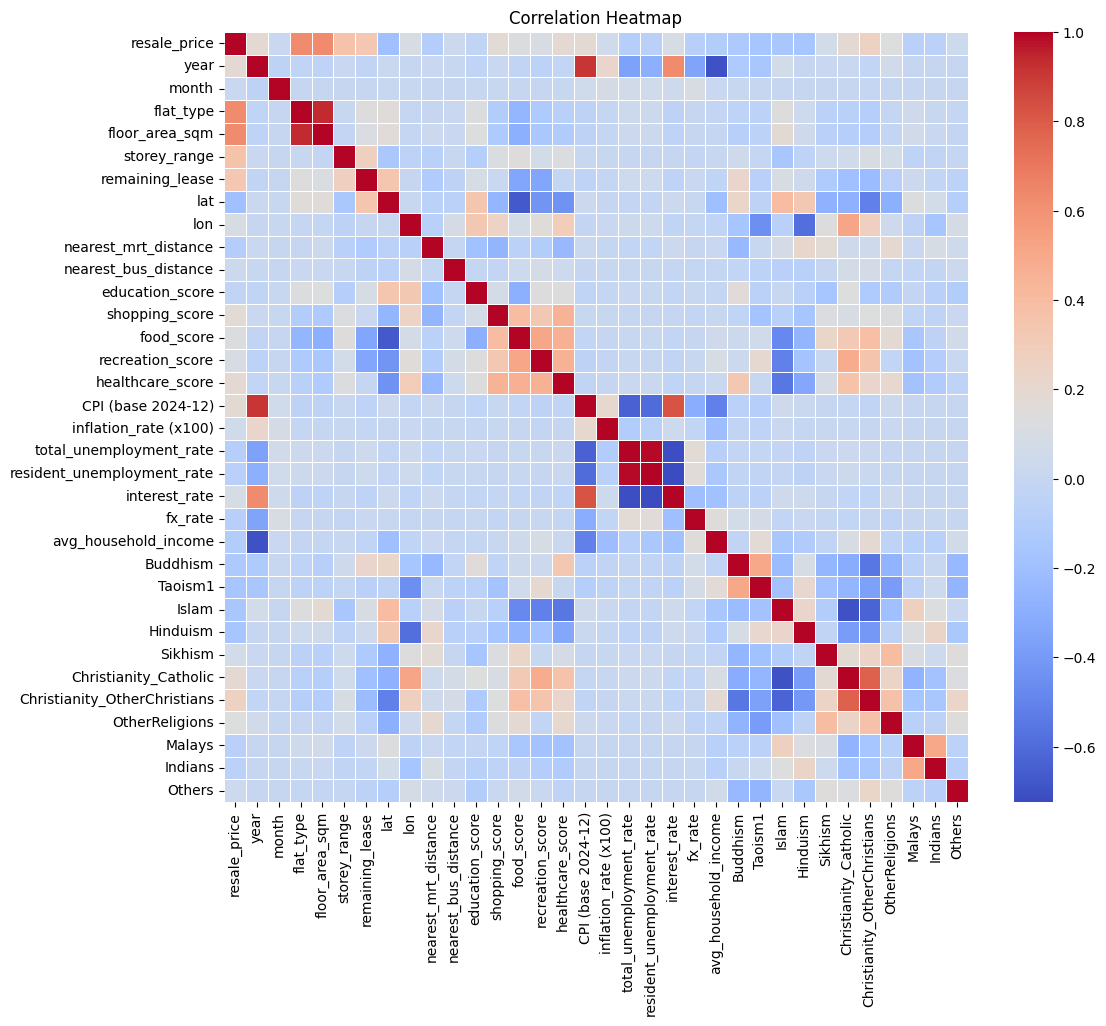

In [6]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt='.2f', linewidths=0.4)
plt.title('Correlation Heatmap')
plt.show()

In [8]:
# from statsmodels.stats.outliers_influence import variance_inflation_factor
# from patsy import dmatrices

# numeric_columns = df.select_dtypes(include=['number']).columns
# numeric_columns = numeric_columns.drop('resale_price')

# vif_data = pd.DataFrame()
# vif_data['Feature'] = numeric_columns
# vif_data['VIF'] = [variance_inflation_factor(df[numeric_columns].values, i) for i in range(len(numeric_columns))]

# print(vif_data)
